In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [2]:
class AdvancedMNISTDataset(Dataset):
    def __init__(self, root_dir, split="train", transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform

        self.data_path = os.path.join(self.root_dir, self.split)

        if not os.path.exists(self.data_path):
            raise FileNotFoundError(f"{self.data_path} bulunamadı.")

        self.samples = []
        self._scan_dataset()

    def _scan_dataset(self):
        for img_name in os.listdir(self.data_path):
            if img_name.endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(self.data_path, img_name)
                label = int(img_name.split("_")[0])
                self.samples.append((img_path, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("L")

        if self.transform:
            image = self.transform(image)

        return image, label

    def class_distribution(self):
        labels = [label for _, label in self.samples]
        return Counter(labels)


=== DATASET INFO ===
Toplam örnek: 60000
Bir örneğin shape'i: torch.Size([1, 28, 28])
Label: 0

=== CLASS DISTRIBUTION ===
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})

=== RANDOM SAMPLES ===


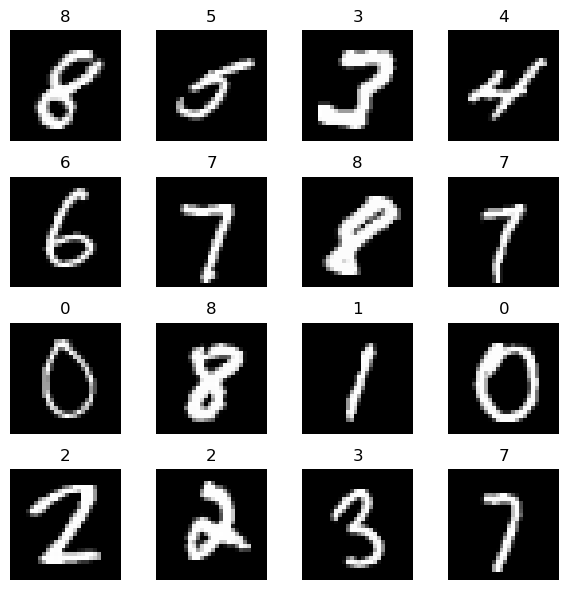

In [ ]:
def main():

    transform = transforms.ToTensor()

    DATA_PATH = "."   

    train_dataset = AdvancedMNISTDataset(DATA_PATH, "train", transform)

    print("\n=== DATASET INFO ===")
    print("Toplam örnek:", len(train_dataset))

    # Örnek veri
    image, label = train_dataset[0]
    print("Bir örneğin shape'i:", image.shape)
    print("Label:", label)

    # Class dağılımı
    print("\n=== CLASS DISTRIBUTION ===")
    print(train_dataset.class_distribution())

    # Random 16 örnek göster
    print("\n=== RANDOM SAMPLES ===")
    plt.figure(figsize=(6,6))
    for i in range(16):
        idx = random.randint(0, len(train_dataset)-1)
        img, lbl = train_dataset[idx]
        img = img.squeeze().numpy()

        plt.subplot(4,4,i+1)
        plt.imshow(img, cmap="gray")
        plt.title(str(lbl))
        plt.axis("off")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()